In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
from keras.applications.vgg19 import (VGG19, preprocess_input, decode_predictions)

HEIGHT = 224
WIDTH = 224

base_model = VGG19(weights='imagenet', 
                      include_top=False, 
                      input_shape=(HEIGHT, WIDTH, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
from keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = "../Datasets/Training"
HEIGHT = 224
WIDTH = 224
BATCH_SIZE = 50

train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True
    )

train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE)

Found 2815 images belonging to 75 classes.


In [4]:
# This grabs all folders and subfolder names in the directory..... more names then there are classes. 
# Will figure this out later. 

import os

directory_list = list()
for root, dirs, _ in os.walk("../Datasets/Training"):
    for name in dirs:
        directory_list.append(name)

print(len(directory_list))

129


In [5]:
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model

def build_finetune_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        # New FC layer, random init
        x = Dense(fc, activation='relu')(x) 
        x = Dropout(dropout)(x)

    # New softmax layer
    predictions = Dense(num_classes, activation='softmax')(x) 
    
    finetune_model = Model(inputs=base_model.input, outputs=predictions)

    return finetune_model

class_list = (['Apple', 'Asparagus', 'Avocado', 'Banana', 'black_beans', 'Brown Sugar', 'butter', 'Cabbage', 'Carrots', 
               'cheddar_cheese', 'Chicken Breast', 'Chicken Leg', 'Chicken Thigh', 'Chocolate', 'coconut_milk', 'Cod', 
              'cottage_cheese', 'Cucumber', 'egg', 'Eggplant', 'Eggs', 'Flour', 'Garlic', 'Ginger', 'Ground Beef', 'Juice',
              'kidney_bean', 'Kiwi', 'Leek', 'Lemon', 'lentils', 'Lime', 'Mango', 'Melon', 'milk', 'mozzarella_cheese', 
              'Mushrooms', 'Nectarine', 'noodles', 'Oathurt', 'Oat-Milk', 'Onion', 'Orange', 'Papaya', 'Passion-Friut', 
              'Peach', 'Pear', 'Perrer', 'Pineapple', 'pinto_beans', 'Plum', 'Pomegranate', 'Potato', 'Red-Beet', 'Red-Grapefruit', 
              'refried_beans', 'Rice', 'Rice Nooddles', 'Salmon', 'Satsumas', 'sour_cream', 'Sour-Cream', 'Sour-Milk', 'Soyghurt', 
              'Soy-Milk', 'Steak', 'swiss_cheese', 'Talapia', 'tofu', 'Tomato', 'Tuna', 'wite_beans', 'Yoghurt', 'yogurt', 'Zucchini'])
FC_LAYERS = [1024, 1024]
dropout = 0.5

finetune_model = build_finetune_model(base_model, 
                                      dropout=dropout, 
                                      fc_layers=FC_LAYERS, 
                                      num_classes=len(class_list))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam

NUM_EPOCHS = 10

BATCH_SIZE = 50    
num_train_images = 2815



adam = Adam(lr=0.00001)
finetune_model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])


filepath="./checkpoints/" + "vgg19" + "_model_weights.h5"
checkpoint = ModelCheckpoint(filepath, monitor=["acc"], verbose=1, mode='max')
callbacks_list = [checkpoint]

history = finetune_model.fit_generator(train_generator, epochs=NUM_EPOCHS, workers=8, 
                                       steps_per_epoch=num_train_images // BATCH_SIZE, 
                                       shuffle=True, callbacks=callbacks_list)

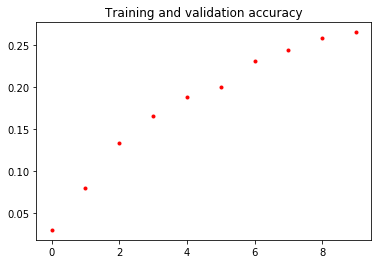

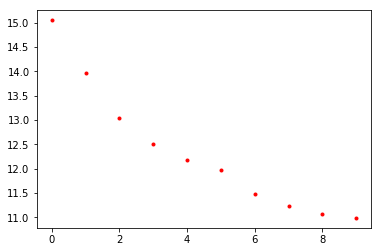

<Figure size 432x288 with 0 Axes>

In [23]:
# Plot the training and validation loss + accuracy
def plot_training(history):
    acc = history.history['acc']
#     val_acc = history.history['val_acc']
    loss = history.history['loss']
#     val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r.')
#     plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')

    plt.figure()
    plt.plot(epochs, loss, 'r.')
#     plt.plot(epochs, val_loss, 'r-')

    plt.show()

    plt.savefig('acc_vs_epochs.png')

plot_training(history)

In [41]:
finetune_model.save("transfer_vgg19_.h5")

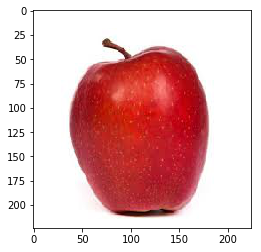

In [42]:
image_size = (224, 224)
image_path = os.path.join("apple01.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [63]:
predictions = 0
def predict(image_path):
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = finetune_model.predict(x)
    return predictions
#     model = Model(inputs=base_model.input, outputs=predictions)
#     print(predictions)
#     plt.imshow(img)
#     print('Predicted:', decode_predictions(predictions, top=3))

In [61]:
predict(image_path)

array([[2.81501445e-03, 2.77775951e-14, 1.04379005e-10, 7.84507392e-09,
        5.68870784e-11, 5.93098379e-13, 6.25020936e-14, 1.10047973e-12,
        1.60007511e-11, 4.26420257e-07, 1.63777971e-14, 2.98295610e-10,
        2.48906527e-14, 5.88262078e-12, 7.55865436e-15, 2.02680293e-13,
        8.92496146e-11, 1.25923761e-15, 1.22940575e-04, 1.25885791e-08,
        7.15235502e-14, 3.36415656e-13, 1.67656111e-14, 2.22523605e-12,
        8.61086511e-14, 9.96971488e-01, 1.80665219e-16, 8.74554877e-14,
        7.06264977e-11, 2.20309500e-15, 6.74586594e-14, 8.02915334e-09,
        3.74806455e-14, 7.25371318e-15, 1.88213414e-14, 2.67403344e-09,
        3.03495153e-06, 4.32846669e-15, 1.38523559e-11, 2.44168286e-09,
        1.14881247e-11, 9.94104868e-11, 4.65941982e-14, 3.82283112e-08,
        2.25911988e-15, 7.93724515e-13, 5.28751127e-15, 1.17680458e-16,
        1.21859651e-08, 3.39945766e-10, 1.53788805e-11, 1.51094483e-14,
        8.85831131e-11, 5.14865206e-10, 4.04114242e-12, 4.064895

In [19]:
finetune_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

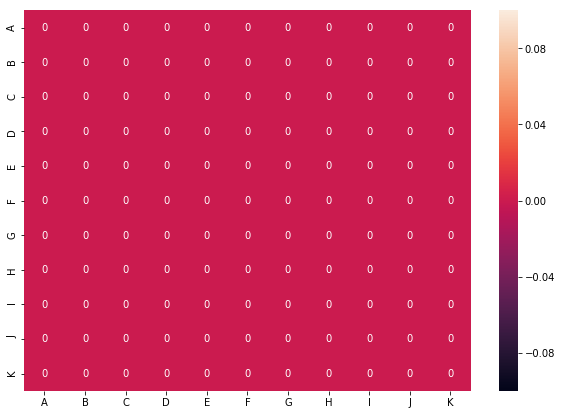

In [64]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(predictions, index = [i for i in "ABCDEFGHIJK"],
                  columns = [i for i in "ABCDEFGHIJK"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
